In [1]:
# Authors: Alexandre Barachant <alexandre.barachant@gmail.com>
#
# License: BSD (3-clause)

import moabb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from mne.decoding import CSP

from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace

from moabb.datasets import BNCI2014002
from moabb.paradigms import MotorImagery
from moabb.evaluations import CrossSubjectEvaluation, WithinSessionEvaluation
from moabb.analysis.plotting import paired_plot

moabb.set_log_level('info')

D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
pipelines = {}

pipelines['CSP + LDA'] = make_pipeline(CSP(n_components=8),
                                       LDA())

pipelines['CSP + RF'] = make_pipeline(CSP(n_components=8),
                                     RandomForestClassifier(n_estimators=1000))

In [3]:
paradigm = MotorImagery()
# Because this is being auto-generated we only use 2 subjects
dataset = BNCI2014002()
dataset.subject_list = dataset.subject_list[:13]
datasets = [dataset]
overwrite = False  # set to True if we want to overwrite cached results
evaluation = WithinSessionEvaluation(paradigm=paradigm, datasets=datasets,
                                    suffix='examples', overwrite=overwrite)

results = evaluation.process(pipelines)

print(results.head())

2020-04-04 13:00:23 DESKTOP-V8QLV56 root[2184] WARNING Choosing from all possible events
2020-04-04 13:00:23 DESKTOP-V8QLV56 root[2184] INFO Processing dataset: 002-2014


      score      time  samples subject    session  channels  n_sessions  \
0  0.748828  1.336217    160.0       1  session_0        15           1   
1  0.890625  1.340821    160.0       2  session_0        15           1   
2  1.000000  1.309993    160.0       3  session_0        15           1   
3  0.933594  1.305989    160.0       4  session_0        15           1   
4  0.794141  1.322604    160.0       5  session_0        15           1   

    dataset  pipeline  
0  002-2014  CSP + RF  
1  002-2014  CSP + RF  
2  002-2014  CSP + RF  
3  002-2014  CSP + RF  
4  002-2014  CSP + RF  


In [4]:
print(results)

       score      time  samples subject    session  channels  n_sessions  \
0   0.748828  1.336217    160.0       1  session_0        15           1   
1   0.890625  1.340821    160.0       2  session_0        15           1   
2   1.000000  1.309993    160.0       3  session_0        15           1   
3   0.933594  1.305989    160.0       4  session_0        15           1   
4   0.794141  1.322604    160.0       5  session_0        15           1   
5   0.772266  1.342422    160.0       6  session_0        15           1   
6   0.956250  1.316199    160.0       7  session_0        15           1   
7   0.956250  1.307390    160.0       8  session_0        15           1   
8   0.961719  1.314597    160.0       9  session_0        15           1   
9   0.687891  1.344424    160.0      10  session_0        15           1   
10  0.899219  1.325407    160.0      11  session_0        15           1   
11  0.814062  1.329410    160.0      12  session_0        15           1   
12  0.614453

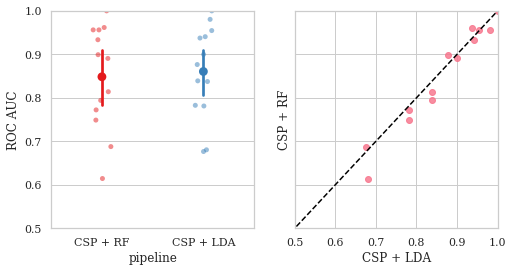

In [5]:
fig, axes = plt.subplots(1, 2, figsize=[8, 4], sharey=True)

sns.stripplot(data=results, y='score', x='pipeline', ax=axes[0], jitter=True,
              alpha=.5, zorder=1, palette="Set1")
sns.pointplot(data=results, y='score', x='pipeline', ax=axes[0],
              zorder=1, palette="Set1")

axes[0].set_ylabel('ROC AUC')
axes[0].set_ylim(0.5, 1)

# paired plot
paired = results.pivot_table(values='score', columns='pipeline',
                             index=['subject', 'session'])
paired = paired.reset_index()

sns.regplot(data=paired, y='CSP + RF', x='CSP + LDA', ax=axes[1],
            fit_reg=False)
axes[1].plot([0, 1], [0, 1], ls='--', c='k')
axes[1].set_xlim(0.5, 1)

plt.show()

In [15]:
plotting.paired_plot(data=results, alg1, alg2)

SyntaxError: positional argument follows keyword argument (<ipython-input-15-cc1e72c1419a>, line 1)

,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0.748828,1.336217,160.0,1,session_0,15,1,002-2014,CSP + RF
1,0.890625,1.340821,160.0,2,session_0,15,1,002-2014,CSP + RF
2,1.000000,1.309993,160.0,3,session_0,15,1,002-2014,CSP + RF
3,0.933594,1.305989,160.0,4,session_0,15,1,002-2014,CSP + RF
4,0.794141,1.322604,160.0,5,session_0,15,1,002-2014,CSP + RF
5,0.772266,1.342422,160.0,6,session_0,15,1,002-2014,CSP + RF
6,0.956250,1.316199,160.0,7,session_0,15,1,002-2014,CSP + RF
7,0.956250,1.307390,160.0,8,session_0,15,1,002-2014,CSP + RF
8,0.961719,1.314597,160.0,9,session_0,15,1,002-2014,CSP + RF
9,0.687891,1.344424,160.0,10,session_0,15,1,002-2014,CSP + RF
